# **TechStream Solutions 🌐**

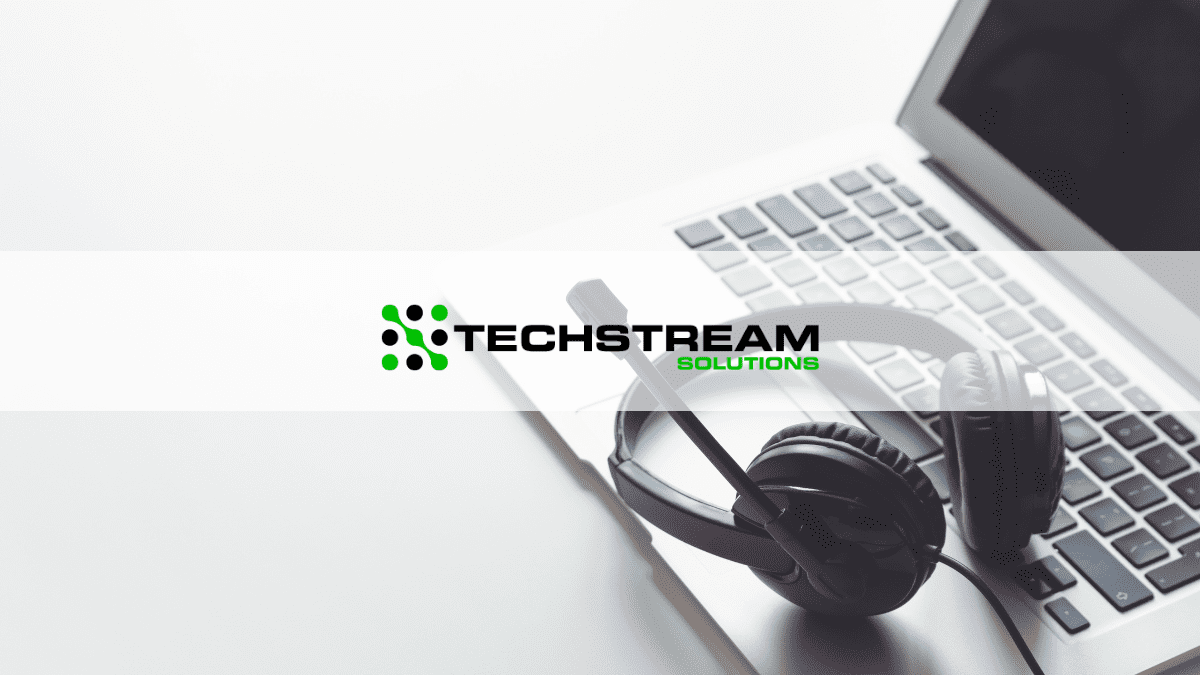

## **1. Import dataset 📥**

In [ ]:
import pandas as pd

In [ ]:
# Monthly expenses dataset

google_sheet_id = '10OGbaywwMIqKgnPGy8VDvpBVtjyqln47iYa2lFhI9Mw'
url = 'https://docs.google.com/spreadsheets/d/' + google_sheet_id + '/export?format=xlsx'
monthly_expenses = pd.read_excel(url, sheet_name='Sheet1')

In [ ]:
# Payroll dataset

google_sheet_id = '1c_WihqTZCQvNgxzmd-OwhR9i5diwtfxXVLyMn8R-Lp4'
url = 'https://docs.google.com/spreadsheets/d/' + google_sheet_id + '/export?format=xlsx'
payroll = pd.read_excel(url, sheet_name='Sheet1')

In [ ]:
# Daily marketing spendings dataset

google_sheet_id = '1AZOIThOV4P-0eYDge53ZwumVkfkHoYPWxst3k3Bv87c'
url = 'https://docs.google.com/spreadsheets/d/' + google_sheet_id + '/export?format=xlsx'
daily_marketing_spendings = pd.read_excel(url, sheet_name='Sheet1')

In [ ]:
# Receipts history dataset

google_sheet_id = '1qayqML1zCKdmtzutkcy9LWvE6xFRm6TGBEVkHHJKIuE'
url = 'https://docs.google.com/spreadsheets/d/' + google_sheet_id + '/export?format=xlsx'
receipts_history = pd.read_excel(url, sheet_name='Sheet1')

In [ ]:
# customer_lifespan_data

google_sheet_id = '1by8tPHwOnq3uKYK2E7sA9VBUYoPM4p1Rnrm_Ss9cyHI'
url = 'https://docs.google.com/spreadsheets/d/' + google_sheet_id + '/export?format=xlsx'
customer_lifespan_data = pd.read_excel(url, sheet_name='Sheet1')

## **2. CAC (Customer Acquisition Cost) in March 🛍️**

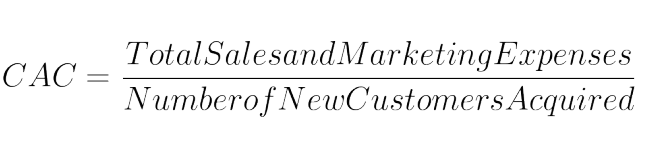

In [ ]:
monthly_expenses.sample(5)

,#,month,category,item,amount
19,20,2023-03-01,Server Costs,Google Cloud Storage,4400
25,26,2023-03-01,Other,Office Supplies,600
15,16,2023-02-01,Office Rental,Office Rent,10000
8,9,2023-01-01,Other,Travel Expenses,3000
10,11,2023-02-01,Server Costs,Google Cloud Storage,4200


In [ ]:
expense_202303 = monthly_expenses[monthly_expenses['month'] == '2023-03-01']

### 2.1 Marketing Software Expense

In [ ]:
# crm_expense = expense_202303[expense_202303['item'] == 'Salesforce']['amount'].values[0] (Alternative Option)

crm_expense = expense_202303[expense_202303['item'] == 'Salesforce']['amount'].sum()
crm_expense

np.int64(1700)

### 2.1 Sales & Marketing Salaries

In [ ]:
payroll.sample(5)

,month,department,employee_name,position,paid
37,2023-03-01,Sales,Laura Miller,Sales Associate,800
48,2023-03-01,Analytics,Michael Brown,Analytics Manager,1700
26,2023-02-01,HR,Frank Green,HR Manager,1300
39,2023-03-01,Marketing,Bob Davis,Content Specialist,700
18,2023-02-01,Sales,Jane Smith,Sales Associate,600


In [ ]:
payroll_202303 = payroll[payroll['month'] == '2023-03-01']

In [ ]:
sales_marketing_salary = payroll_202303[(payroll_202303['department'] == 'Sales') |\
                                        (payroll_202303['department'] == 'Marketing')]['paid'].sum()
sales_marketing_salary

np.int64(5950)

### 2.3 Daily Marketing Spendings

In [ ]:
daily_marketing_spendings.sample(5)

,date,channel,spending
19,2023-01-05,Twitter Ads,805
127,2023-02-01,Twitter Ads,483
238,2023-03-01,LinkedIn Ads,835
158,2023-02-09,LinkedIn Ads,180
220,2023-02-25,Google Ads,426


In [ ]:
daily_marketing_spendings_202303 = daily_marketing_spendings[(daily_marketing_spendings['date'] >= '2023-03-01') & (daily_marketing_spendings['date'] <= '2023-03-31')]

In [ ]:
daily_marketing_expenses = daily_marketing_spendings_202303['spending'].sum()
daily_marketing_expenses

np.int64(68830)

### 2.4 New customers record

In [ ]:
receipts_history.sample(5)

,date,customer_id,receipt_amount,new_customer
424,2023-02-10,1888,55,0
32,2023-01-05,1816,438,1
872,2023-03-25,1323,62,0
27,2023-01-04,2167,354,0
437,2023-02-11,1814,228,1


In [ ]:
receipts_history_202303 = receipts_history[(receipts_history['date'] >= '2023-03-01') & (receipts_history['date'] <= '2023-03-31')]

In [ ]:
new_customers = receipts_history_202303[(receipts_history_202303['new_customer'] == 1)]['customer_id'].nunique()
new_customers

63

### 2.5 CAC CALCULATION

In [ ]:
total_acquisition_cost = crm_expense + sales_marketing_salary + daily_marketing_expenses
CAC = round(total_acquisition_cost / new_customers, 2)
CAC

np.float64(1213.97)

## **3. ARPU (Average revenue per user) 📊**


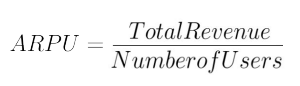

### 3.1 All customers

In [ ]:
number_of_customers = receipts_history_202303['customer_id'].nunique()
number_of_customers

292

### 3.2 ARPU calculation

In [ ]:
ARPU = round(receipts_history_202303['receipt_amount'].sum() / number_of_customers, 2)
ARPU

np.float64(284.36)

## **4. COGS (Cost of Goods Sold) 🏭**

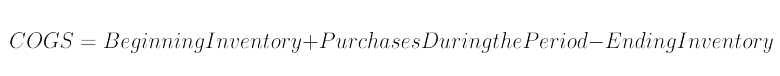

### 4.1 Software expenses

In [ ]:
admin_expenses = ['AWS Hosting', 'Google Cloud Storage', 'Atlassian Jira']
software_expenses = expense_202303[expense_202303['item'].isin(admin_expenses)]['amount'].sum()
software_expenses

np.int64(14200)

### 4.2 Streaming expenses

In [ ]:
streaming_expenses = ['Zoom', 'Slack']
streaming_software_expenses = expense_202303[expense_202303['item'].isin(streaming_expenses)]['amount'].sum()  * 0.6
streaming_software_expenses

np.float64(864.0)

### 4.3 Production expenses

In [ ]:
production_expenses = payroll_202303[payroll_202303['department'] == 'Engineering']['paid'].sum()
production_expenses

np.int64(5200)

### 4.4 COGS calculation

In [ ]:
COGS = software_expenses+ streaming_software_expenses+ production_expenses
COGS

np.float64(20264.0)

## **5. Gross Margin 📈**

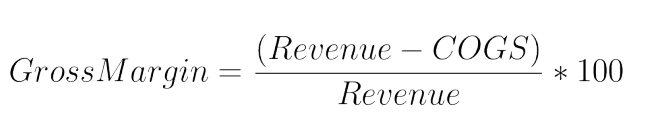

In [ ]:
total_revenue = receipts_history_202303['receipt_amount'].sum()

In [ ]:
gross_margin = round((total_revenue - COGS)/ total_revenue * 100, 2)
gross_margin

np.float64(75.6)

## **6. LTV (Customer lifetime value) 🔁**

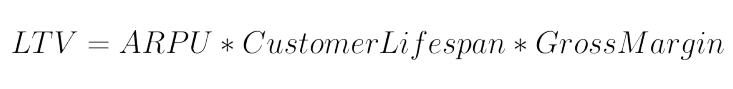

### **6.1 The average customer lifespan**

In [ ]:
customer_lifespan_data['lifespan_days'] = pd.to_datetime(customer_lifespan_data['churn_date']) - pd.to_datetime(customer_lifespan_data['start_date'])
customer_lifespan_data['lifespan_days'] = customer_lifespan_data['lifespan_days'].dt.days
customer_lifespan_data.sample(5)

,Unnamed: 0,start_date,churn_date,lifespan_days
73,1073,2020-04-21,2021-05-14,388
81,1081,2020-07-31,2022-07-10,709
29,1029,2021-10-01,2022-09-20,354
0,1000,2021-11-15,2022-09-14,303
88,1088,2022-02-16,2023-02-08,357


In [ ]:
avg_lifespan_month = customer_lifespan_data['lifespan_days'].mean() /30
avg_lifespan_month

np.float64(9.841333333333333)

### **6.2 LTV calculation**

In [ ]:
LTV = ARPU * avg_lifespan_month * gross_margin / 100
LTV

np.float64(2115.65204928)

## **7. LTV/CAC Ratio ⚖️**

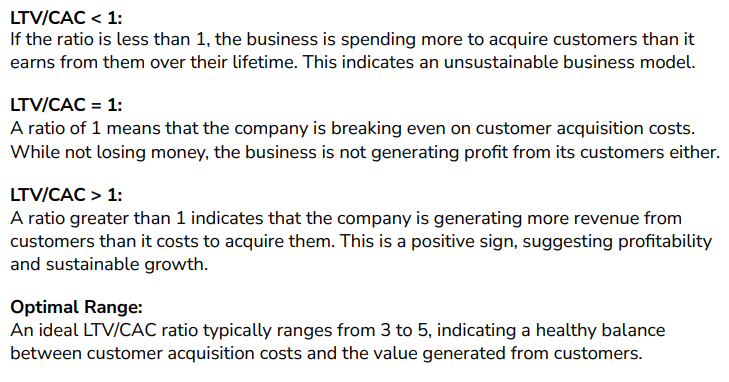

In [ ]:
Ratio = LTV / CAC
Ratio

np.float64(1.7427548038913647)

## **8. Conclusion and recommendations💡**

**Customer Metrics Summary 📝:**

- CAC (Customer Acquisition Cost): (`$1,213.97`)
- ARPU (Avg. Revenue Per User): (`$284.36`)
- Gross Margin: (`75.6%`)
- LTV (Customer Lifetime Value): (`$2,115.65`)
- LTV/CAC Ratio: (`1.74`)

**Quick Insights 🧠**

- LTV/CAC = 1.74 > 1 → Good! You're earning more per customer than you spend to acquire them.

- However, the optimal LTV/CAC is between 3 and 5 — this means:

You may need to either reduce CAC or increase ARPU/LTV to maximize profitability.

**Suggestions 📌:**

- Reduce CAC: Optimize marketing spend, improve targeting. Therefore, the LTV would be greater and reach to the range of 3 to 5

- Boost ARPU: Upsell/cross-sell, creater subscription tiers incentives, or increase prices in certain products then schedule a discount in certain of time to attract customer psychologically. The ARPU will have a chance to surpass the (`$284.36`) and increase the customer's cart value.

- Improve LTV: Consider designing more appealing loyalty program and include many benefit based on existent customer's buying behaviors and habits. This will improve the LTV value ($2,115.65)  